In [104]:
import numpy as np
import pandas as pd 
from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier 
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support
%matplotlib inline
import seaborn as sns
from IPython.display import Image
import matplotlib.pyplot as plt
import scipy.stats

In [105]:
templateFeatFile = "../Data/templateFeats.csv"
DataFeats = "../Data/trainAugFeats.csv"
AugTest = "../Data/sampledAugment.csv"

In [106]:
with open("../Data/TrainImageListBinary_augmented.txt",'r') as f:
    imagePaths = f.readlines()
    
with open("../Data/templatePaths.txt",'r') as f:
    templatePaths = f.readlines()

In [107]:
images = map(lambda it: it.split(',')[0].strip(), imagePaths)

In [108]:
templates = map(lambda it: it.strip(), templatePaths)

In [109]:
templateFeats = pd.read_csv(templateFeatFile , header=None)
dataFeats = pd.read_csv(DataFeats , header=None)

In [113]:
len(imagePaths)

18627

In [110]:
templateMatrix = templateFeats.as_matrix()
dataMatrix = dataFeats.as_matrix()

In [ ]:
featureDf.head()

In [18]:
from scipy.spatial.distance import cdist

In [19]:
# maps = cdist(templateMatrix, dataMatrix, 'seuclidean', V=None)

In [20]:
maps = cdist(templateMatrix, dataMatrix, 'euclidean')

In [21]:
maps.shape

(6, 18627)

In [22]:
top5 = maps[5].argsort()[:10]

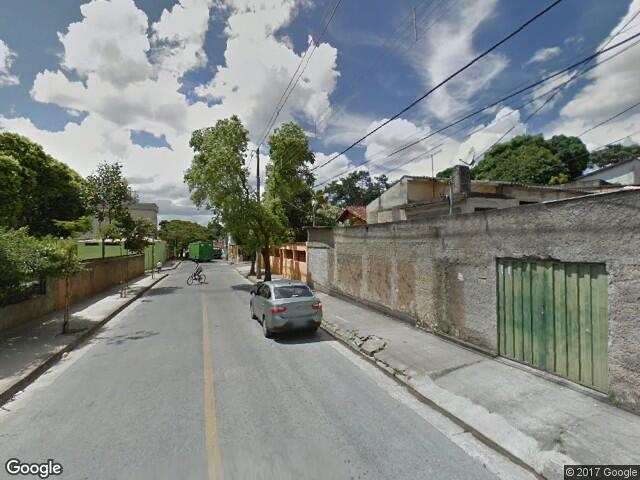

In [23]:
Image(images[top5[5]])

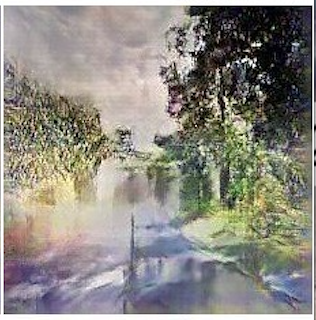

In [24]:
Image(templates[0])

In [42]:
Feats = pd.read_csv(AugTest)

In [43]:
len(Feats)

3026

In [44]:
Feats.head()

,Unnamed: 0,feats,key,prime
0,0,0,0,0
1,0,"[0.0, 0.0, 0.0, 0.0, 0.20564067363739014, 0.0,...",513d6a3cfdc9f035870049d8,513d6a3cfdc9f035870049d8
2,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.05769592523574829,...",513d6a3cfdc9f035870049d831,513d6a3cfdc9f035870049d8
3,0,"[0.0, 0.5638058185577393, 0.0, 0.0, 0.0, 0.089...",513d6a3cfdc9f035870049d824,513d6a3cfdc9f035870049d8
4,0,"[0.0, 0.26701682806015015, 0.7439135313034058,...",513d6a3cfdc9f035870049d844,513d6a3cfdc9f035870049d8


In [64]:
feats = Feats.drop(Feats.index[0]).astype('object')

In [65]:
feats.head()

,Unnamed: 0,feats,key,prime
1,0,"[0.0, 0.0, 0.0, 0.0, 0.20564067363739014, 0.0,...",513d6a3cfdc9f035870049d8,513d6a3cfdc9f035870049d8
2,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.05769592523574829,...",513d6a3cfdc9f035870049d831,513d6a3cfdc9f035870049d8
3,0,"[0.0, 0.5638058185577393, 0.0, 0.0, 0.0, 0.089...",513d6a3cfdc9f035870049d824,513d6a3cfdc9f035870049d8
4,0,"[0.0, 0.26701682806015015, 0.7439135313034058,...",513d6a3cfdc9f035870049d844,513d6a3cfdc9f035870049d8
5,0,"[0.0, 0.5362322330474854, 0.0, 0.0411850214004...",513d6a3cfdc9f035870049d832,513d6a3cfdc9f035870049d8


In [66]:
groupedFeats = feats.groupby('prime')

In [67]:
groupedFeats.groups.keys()

['513d6a3cfdc9f035870049d8',
 '513d7a65fdc9f035870067fd',
 '513d6b52fdc9f03587004cbf',
 '513d7bfefdc9f03587006d4d',
 '513d7ddefdc9f035870072ae',
 '5140b65cfdc9f049260016c6',
 '513d7bb3fdc9f03587006c56',
 '513d9f27fdc9f03587008656',
 '513d6a58fdc9f03587004a39',
 '513d9b2cfdc9f03587007915',
 '513d7dcafdc9f03587007284',
 '513d7b2bfdc9f03587006a8a',
 '513d6986fdc9f0358700476d',
 '513d9da0fdc9f03587008131',
 '5140b6b0fdc9f049260017c1',
 '513d6a3ffdc9f035870049e4',
 '513d7e1efdc9f03587007332',
 '513d7995fdc9f0358700654d',
 '513d9d97fdc9f03587008113',
 '513d9b76fdc9f03587007a05',
 '513d7e58fdc9f035870073af',
 '513d78ecfdc9f03587006324',
 '513d6829fdc9f03587004294',
 '513d69e4fdc9f035870048ae',
 '5140b7e2fdc9f04926001b18',
 '513d7dfafdc9f035870072ed',
 '513d7a9cfdc9f035870068c4',
 '513d7b37fdc9f03587006ab1',
 '513d69c3fdc9f03587004842',
 '513d6797fdc9f035870040f9',
 '5140b74dfdc9f04926001978',
 '513d6b3bfdc9f03587004c8b',
 '513d68d8fdc9f035870044f9',
 '513d7e26fdc9f03587007340',
 '513d9d63fdc9

In [68]:
df = groupedFeats.get_group('5140b687fdc9f04926001751')


In [69]:
df

,Unnamed: 0,feats,key,prime
2894,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.90689939...",5140b687fdc9f04926001751,5140b687fdc9f04926001751
2895,0,"[0.05310416221618652, 0.0, 0.06125432252883911...",5140b687fdc9f0492600175160,5140b687fdc9f04926001751
2896,0,"[0.0, 0.0, 0.10922521352767944, 0.0, 0.0, 0.0,...",5140b687fdc9f0492600175151,5140b687fdc9f04926001751
2897,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.6176405549049377, ...",5140b687fdc9f0492600175142,5140b687fdc9f04926001751
2898,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.47996747...",5140b687fdc9f0492600175132,5140b687fdc9f04926001751
2899,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.24754321575164795,...",5140b687fdc9f0492600175141,5140b687fdc9f04926001751
2900,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1833203434944...",5140b687fdc9f0492600175125,5140b687fdc9f04926001751
2901,0,"[0.6652644872665405, 0.1622665524482727, 0.0, ...",5140b687fdc9f0492600175175,5140b687fdc9f04926001751
2902,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.03036904...",5140b687fdc9f0492600175152,5140b687fdc9f04926001751
2903,0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.18720936...",5140b687fdc9f0492600175133,5140b687fdc9f04926001751


In [73]:
a = np.asarray(eval(df.iloc[0]['feats']))

In [75]:
a

array([ 0.       ,  0.       ,  0.       , ...,  0.       ,  0.4270103,  0.       ])

In [101]:
from itertools import combinations
from scipy.spatial.distance import euclidean


mutualDists = {}
neighbours = {}
for combo in combinations(groupedFeats.groups.keys()[:10], 2):
    df1 = groupedFeats.get_group(combo[0])
    df2 = groupedFeats.get_group(combo[1])

    dismilarity = euclidean(np.asarray(eval(df1.iloc[0]['feats'])), np.asarray(eval(df2.iloc[0]['feats'])))
    if combo[0] not in mutualDists.keys():
        mutualDists[combo[0]] = {}
    mutualDists[combo[0]][combo[1]] = dismilarity
    
    if combo[0] not in neighbours.keys():
        dist = []
        for i in range(1,len(df1)):
            dist.append(euclidean(np.asarray(eval(df1.iloc[0]['feats'])), np.asarray(eval(df1.iloc[i]['feats']))))
        neighbours[combo[0]]= np.median(dist)
    if combo[1] not in neighbours.keys():
        dist = []
        for i in range(1,len(df2)):
            dist.append(euclidean(np.asarray(eval(df2.iloc[0]['feats'])), np.asarray(eval(df2.iloc[i]['feats']))))
        neighbours[combo[1]]= np.median(dist)
            
    

    

In [102]:
mutualDists['513d6a3cfdc9f035870049d8']

{'513d6a58fdc9f03587004a39': 30.610518402156764,
 '513d6b52fdc9f03587004cbf': 32.11654475444476,
 '513d7a65fdc9f035870067fd': 27.230357364819785,
 '513d7bb3fdc9f03587006c56': 30.439861051108743,
 '513d7bfefdc9f03587006d4d': 29.804323719670474,
 '513d7ddefdc9f035870072ae': 30.953049083524625,
 '513d9b2cfdc9f03587007915': 35.03912624896554,
 '513d9f27fdc9f03587008656': 34.475692851037834,
 '5140b65cfdc9f049260016c6': 25.620624948112354}

In [95]:
len(neighbours.keys())

275

In [103]:
relativeDist = []
for combo in combinations(groupedFeats.groups.keys(), 2):
    num = neighbours[combo[0]] + neighbours[combo[1]]
    denom = 2*(mutualDists[combo[0]][combo[1]])
    relativeDist.append(float(num)/float(denom))


KeyError: '513d7dcafdc9f03587007284'

In [ ]:
sns.distplot(relativeDist , kde_kws={"color": "g", "lw": 2, "label": "Distribution of Relative differences between local and remote images"},)